## ข้อ 3

<font size="4">หาความสัมพันธ์ทางคณิตศาสตร์<font/>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/data3.csv')
df.tail()

,x,y
115,160,-51254.19264
116,162,-51706.61594
117,164,-53790.28012
118,166,-54276.33110
119,168,-54116.30938


In [4]:
X = df['x'].to_numpy()
y = df['y'].to_numpy()

<font size="3">สร้างกราฟเพื่อวิเคราะห์ความแม่นยำของ สมการที่ได้ โดยทดลองตั้งค่า degree ต่างกันเรื่อยๆ<font/>

In [5]:
def polyregress(xdata,ydata,degree):
  return np.polynomial.polynomial.polyfit(xdata,ydata,degree) #สร้างฟังชันก์เพื่อสร้างสมการขึ้นมา
poly_x = polyregress(X,y,4) #โดยจะลองเปลี่ยนdegreeเรื่อยๆ เพื่อหาdegreeที่เหมาะสม
poly_x


array([ 1.19513542e+03, -3.62201023e+00,  2.71158346e-01, -3.08421434e-02,
        1.04212187e-04])

<font size="4">ได้สมการว่า <font/>
<font size="3">y = 0.000104X^3 + 0.271X^2 + -3.622X^1 + 119.513   <font/>

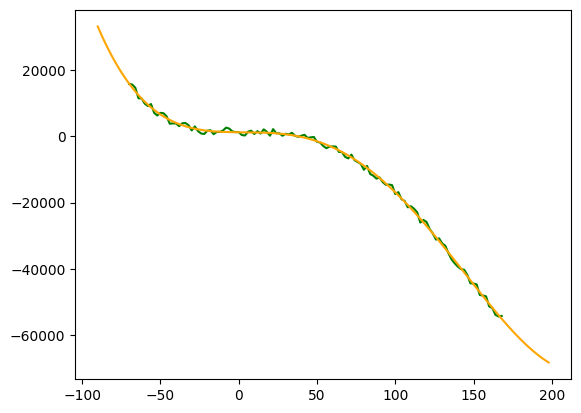

In [6]:
#สร้างกราฟเพื่อเปรียบเทียบระหว่างค่าจริงกับสมการที่สร้างขึ้น
ans_arr=[]
for a in range(-90,200,2):
    ans=0
    for j in range(len(poly_x)):
        ans += poly_x[j]*a**j
    ans_arr+=[ans]
x_pred = np.arange(-90,200,2)
df = pd.read_csv('./data/data3.csv')
x = df['x']
y = df['y']
plt.plot(x,y,color='green')
plt.plot(x_pred,ans_arr,color='orange')

<font size="4">พบว่า <font/>
<font size="3">y = 0.000104X^3 + 0.271X^2 + -3.622X^1 + 119.513  (คำตอบ) <font/>

<font size="3">การใช้degree=4 ทำให้สมการที่ได้ไม่ overfit กับdataจนเกินไป<font/>

<font size="4">ทำนายเมื่อ x=170<font/>

In [7]:
#สร้าง data train จากสมการเพื่อเป็นการลด noise จากข้อมูลที่ได้
ans_arr=[]
for a in range(-70,170,1):
    ans=0
    for j in range(len(poly_x)):
        ans += poly_x[j]*a**j
    ans_arr+=[ans]

In [8]:
X = np.arange(-70,170)
y = np.array(ans_arr)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
!pip install catboost

In [10]:
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor(iterations=1500, depth=9,learning_rate=0.04627823525262093, loss_function='RMSE', verbose=500)
cat_model.fit(X_train, y_train,eval_set=(X_test, y_test))

0:	learn: 17030.2746079	test: 19037.6941443	best: 19037.6941443 (0)	total: 153ms	remaining: 3m 48s
500:	learn: 146.3443352	test: 344.7809282	best: 344.6644336 (499)	total: 1.75s	remaining: 3.48s
1000:	learn: 73.9084083	test: 354.1301984	best: 344.6191615 (506)	total: 3.29s	remaining: 1.64s
1499:	learn: 46.0471271	test: 365.5396848	best: 344.6191615 (506)	total: 4.85s	remaining: 0us

bestTest = 344.6191615
bestIteration = 506

Shrink model to first 507 iterations.


<font size="3">ค่า y เมื่อ x = 170 (คำตอบ)<font/>

In [16]:
y_pred = cat_model.predict([170.])
print("เมื่อ x = 170 ค่า y จะเท่ากับ",y_pred)

เมื่อ x = 170 ค่า y จะเท่ากับ -55456.474412783056


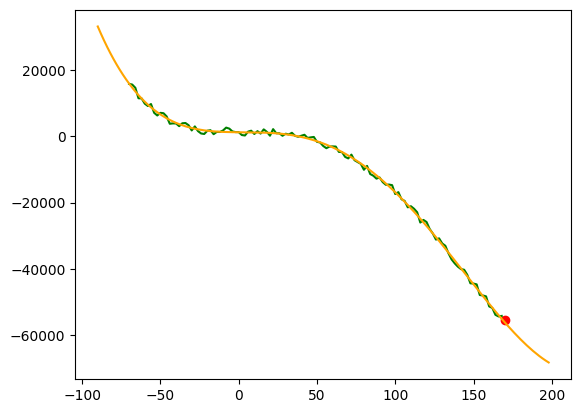

In [17]:
#เมื่อนำไปเปรียบเทียบกับ data ที่ให้มา
ans_arr=[]
for a in range(-90,200,2):
    ans=0
    for j in range(len(poly_x)):
        ans += poly_x[j]*a**j
    ans_arr+=[ans]
x_pred = np.arange(-90,200,2)
df = pd.read_csv('./data/data3.csv')
x = df['x']
y = df['y']
plt.plot(x,y,color='green')
plt.plot(x_pred,ans_arr,color='orange')
plt.scatter(170.,y_pred,c='r')